## Softmax

In [1]:
import numpy as np

In [19]:
vector = np.array([11231, 999, 123142])

In [28]:
vector = np.array([-10, 10, 24])

In [33]:
def softmax(vec):
    vec -= np.max(vec)
    exp = np.exp(vec)
    return exp / np.sum(exp)

In [32]:
softmax(vector)

array([1.71390701e-15, 8.31528028e-07, 9.99999168e-01])

## Assignment-04 基于维基百科的词向量构建

在本章，你将使用Gensim和维基百科获得你的第一批词向量，并且感受词向量的基本过程。

![](https://www.kaggleusercontent.com/kf/1018109/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..JNNggcCCDcYEypvp7ZDwOA.cM9CuDpuCKo0K_ZkMFLAUvhfip0P6SRZ4LddwgTtgwz8pQy1dZeGVJWi6u81KSpAFNSi7YximVVJbPw8xsFySdWlqoUwvSER-LLIRfmlpsCvtDt90NaLYT2FHlwl0tfF-1MKtiFsWlGQ8LGo40hL3ccBSwMZy214kGJf9bNkW_g.kZbF5sgN5qha3zhjilfSDg/__results___files/__results___9_0.png)

## Step-01: Download Wikipedia Chinese Corpus: https://dumps.wikimedia.org/zhwiki/20190720/

第一步：使用维基百科下载中文语料库

## Step-02: Using https://github.com/attardi/wikiextractor to extract the wikipedia corpus

第二步：使用python wikipedia extractor抽取维基百科的内容

## Step-03: Using gensim get word vectors: 

Reference: 

+ https://radimrehurek.com/gensim/models/word2vec.html
+ https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第三步：参考Gensim的文档和Kaggle的参考文档，获得词向量。 注意，你要使用Jieba分词把维基百科的内容切分成一个一个单词，然后存进新的文件中。然后，你需要用Gensim的LineSentence这个类进行文件的读取。

在训练成词向量Model.

## Step-04: Using some words to test your preformance. 

第四步，测试同义词，找几个单词。

## Step-05: Using visualization tools: https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第五步：使用Kaggle给出的T-SEN进行词向量的可视化。

In [18]:
!pip install gensim

  Using cached https://files.pythonhosted.org/packages/3a/bc/1415be59292a23ff123298b4b46ec4be80b3bfe72c8d188b58ab2653dee4/gensim-3.8.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/37/c0/25d19badc495428dec6a4bf7782de617ee0246a9211af75b302a2681dea7/smart_open-1.8.4.tar.gz
  Using cached https://files.pythonhosted.org/packages/83/94/7179c3832a6d45b266ddb2aac329e101367fbdb11f425f13771d27f225bb/jmespath-0.9.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/16/8a/1fc3dba0c4923c2a76e1ff0d52b305c44606da63f718d14d3231e21c51b0/s3transfer-0.2.1-py2.py3-none-any.whl
  Created wheel for gensim: filename=gensim-3.8.0-cp37-cp37m-win_amd64.whl size=24169609 sha256=7a6c13f28fdec89778a3da98a202106ea0cb2a553116eb12f91df29ef5a8e15d
  Stored in directory: C:\Users\Nicky\AppData\Local\pip\Cache\wheels\2c\19\c6\bf38e867cb6e75999e3ff80302eb27bdf488b333efadfbfed7
  Created wheel for smart-open: filename=smart_open-1.8.4-cp37-none-any.whl size=68206 sha256=e018f49217

In [1]:
!pip install opencc

  Using cached https://files.pythonhosted.org/packages/56/fb/5a7224ede65ac6271d163fcee81d4cb84f42a40667271f970faab97840df/OpenCC-0.2.tar.gz


    ERROR: Complete output from command python setup.py egg_info:
    ERROR: Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\Nicky\AppData\Local\Temp\pip-install-e_x7qp5p\opencc\setup.py", line 19, in <module>
        long_description=fread('README.rst'),
      File "C:\Users\Nicky\AppData\Local\Temp\pip-install-e_x7qp5p\opencc\setup.py", line 10, in fread
        return f.read()
    UnicodeDecodeError: 'gbk' codec can't decode byte 0x80 in position 462: illegal multibyte sequence
    ----------------------------------------
ERROR: Command "python setup.py egg_info" failed with error code 1 in C:\Users\Nicky\AppData\Local\Temp\pip-install-e_x7qp5p\opencc\


In [2]:
!python --version

Python 3.7.3


In [1]:
import opencc

In [2]:
cc = opencc.OpenCC('t2s')

In [3]:
print(cc.convert('Open Chinese Convert（OpenCC）「開放中文轉換」，是一個致力於中文簡繁轉換的項目，提供高質量詞庫和函數庫(libopencc)。'))

Open Chinese Convert（OpenCC）「开放中文转换」，是一个致力于中文简繁转换的项目，提供高质量词库和函数库(libopencc)。


In [10]:
path = "../../wiki.cn.txt"
ff = open(path, 'r', encoding='utf-8')
for line in ff:
    print(line)
    break

歐幾里得 西元前三世紀的古希臘數學家 現在被認為是幾何之父 此畫為拉斐爾的作品 雅典學院 数学 是利用符号语言研究數量 结构 变化以及空间等概念的一門学科 从某种角度看屬於形式科學的一種 數學透過抽象化和邏輯推理的使用 由計數 計算 數學家們拓展這些概念 對數學基本概念的完善 早在古埃及 而在古希臘那裡有更為嚴謹的處理 從那時開始 數學的發展便持續不斷地小幅進展 世紀的文藝復興時期 致使數學的加速发展 直至今日 今日 數學使用在不同的領域中 包括科學 工程 醫學 經濟學和金融學等 有時亦會激起新的數學發現 並導致全新學科的發展 數學家也研究純數學 就是數學本身的实质性內容 而不以任何實際應用為目標 雖然許多研究以純數學開始 但其过程中也發現許多應用之处 詞源 西方语言中 數學 一詞源自於古希臘語的 其有 學習 學問 科學 數學研究 即使在其語源內 其形容詞 意思為 和學習有關的 用功的 亦會被用來指 數學的 其在英语中表面上的複數形式 及在法语中的表面複數形式 可溯至拉丁文的中性複數 由西塞罗譯自希臘文複數 此一希臘語被亚里士多德拿來指 萬物皆數 的概念 汉字表示的 數學 一詞大約产生于中国宋元時期 多指象數之學 但有時也含有今天上的數學意義 例如 秦九韶的 數學九章 永樂大典 數書九章 也被宋代周密所著的 癸辛雜識 記爲 數學大略 數學通軌 明代柯尚遷著 数学钥 清代杜知耕著 數學拾遺 清代丁取忠撰 直到 經過中國數學名詞審查委員會研究 算學 數學 兩詞的使用狀況後 確認以 數學 表示今天意義上的數學含義 历史 奇普 印加帝國時所使用的計數工具 玛雅数字 數學有着久遠的歷史 中國古代的六艺之一就有 數學一詞在西方有希腊语詞源 mathematikós 意思是 学问的基础 源于 máthema 科学 知识 学问 時間的長短等抽象的數量關係 比如时间单位有日 季節和年等 算術 加減乘除 也自然而然地產生了 歷史上曾有過許多不同的記數系統 在最初有歷史記錄的時候 為了解數字間的關係 為了測量土地 以及為了預測天文事件而形成的 结构 空间及时间方面的研究 到了 世纪 算术 微积分的概念也在此時形成 随着數學轉向形式化 從古至今 數學便一直不斷地延展 且與科學有豐富的相互作用 兩者的發展都受惠於彼此 在歷史上有著許多數學發現 並且直至今日都不斷地有新的發現 據mikhail

In [13]:
import re
import jieba
import opencc

In [15]:
cc = opencc.OpenCC('t2s')
fr = open(path, 'r', encoding='utf-8')
fw = open('wiki.sen.txt', 'a+')
for line in fr:
    simple_format = cc.convert(line) # 繁转简
    zh_list = re.findall(u"[\u4e00-\u9fa5]+",simple_format)# 清洗掉非中文数据
    sentence = []
    for short_sentence in zh_list:
        sentence += list(jieba.cut(cc.convert(short_sentence)))# 分词
    fw.write(' '.join(sentence)+'\n')
fr.close()
fw.close()

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\Nicky\AppData\Local\Temp\jieba.cache
Loading model cost 0.941 seconds.
Prefix dict has been built succesfully.


In [17]:
ft = open('wiki.sen.txt','r')
for line in ft:
    print(line)
    break 

欧几里得 西元前 三 世纪 的 古希腊 数学家 现在 被 认为 是 几何 之 父 此画 为 拉斐尔 的 作品 雅典 学院 数学 是 利用 符号语言 研究 数量 结构 变化 以及 空间 等 概念 的 一门 学科 从 某种 角度看 属于 形式 科学 的 一种 数学 透过 抽象化 和 逻辑推理 的 使用 由 计数 计算 数学家 们 拓展 这些 概念 对 数学 基本概念 的 完善 早 在 古埃及 而 在 古希腊 那里 有 更为 严谨 的 处理 从 那时 开始 数学 的 发展 便 持续 不断 地 小幅 进展 世纪 的 文艺复兴 时期 致使 数学 的 加速 发展 直至 今日 今日 数学 使用 在 不同 的 领域 中 包括 科学 工程 医学 经济学 和 金融学 等 有时 亦 会 激起 新 的 数学 发现 并 导致 全新 学科 的 发展 数学家 也 研究 纯数学 就是 数学 本身 的 实质性 内容 而 不以 任何 实际 应用 为 目标 虽然 许多 研究 以 纯数学 开始 但 其 过程 中 也 发现 许多 应用 之 处 词源 西方 语言 中 数学 一 词源 自于 古希腊 语 的 其有 学习 学问 科学 数学 研究 即使 在 其 语源 内 其 形容词 意思 为 和 学习 有关 的 用功 的 亦 会 被 用来 指 数学 的 其 在 英语 中 表面 上 的 复数 形式 及 在 法语 中 的 表面 复数 形式 可溯 至 拉丁文 的 中性 复数 由 西塞罗 译自 希腊文 复数 此一 希腊语 被 亚里士多德 拿来 指 万物 皆 数 的 概念 汉字 表示 的 数学 一词 大约 产生 于 中国 宋元 时期 多指 象数 之学 但 有时 也 含有 今天 上 的 数学 意义 例如 秦九韶 的 数学 九章 永乐 大典 数书 九章 也 被 宋代 周密 所著 的 癸 辛杂识 记 为 数学 大略 数学 通轨 明代 柯尚 迁著 数学 钥 清代 杜知 耕著 数学 拾遗 清代 丁取忠 撰 直到 经过 中国 数学 名词 审查 委员会 研究 算学 数学 两词 的 使用 状况 后 确认 以 数学 表示 今天 意义 上 的 数学 含义 历史 奇普 印加帝国 时所 使用 的 计数 工具 玛雅 数字 数学 有着 久远 的 历史 中国 古代 的 六艺 之一 就 有 数学 一词 在 西方 有 希腊语 词源 意思 是 学问 的 基础 源

In [20]:
import multiprocessing
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

In [23]:
input_file_name = 'wiki.sen.txt'
model_file_name = 'wiki_min_count500.model'

wiki_news = open(input_file_name, 'r',encoding='gbk')
model = Word2Vec(LineSentence(wiki_news), # LineSentence函数可以将保存为行-文档格式的语料转换成WordVec需要的格式
                size = 100,  # 词向量长度
                window = 5,
                min_count = 500,
                workers = multiprocessing.cpu_count())
model.save(model_file_name)

In [24]:
print(2)

2


## 测试几个词语，找出与其最相似的10个词语

In [5]:
from gensim.models import Word2Vec

In [6]:
wiki_model = Word2Vec.load('wiki_min_count500.model')
test = ['文字', '雨水', '汽车', '怪物', '几何','故宫']
for word in test:
    res = wiki_model.most_similar(word)
    print(word)
    print(res)

E:\setup\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.


文字
[('书写', 0.7983459830284119), ('字体', 0.7465933561325073), ('手写', 0.711713433265686), ('文本', 0.6956876516342163), ('满文', 0.6826956272125244), ('文言文', 0.6825900077819824), ('汉字', 0.6808272004127502), ('读法', 0.6615161299705505), ('笔画', 0.6537800431251526), ('阿拉伯文', 0.6483719348907471)]
雨水
[('河水', 0.7710926532745361), ('海水', 0.7555109262466431), ('泥沙', 0.745749294757843), ('地下水', 0.7446226477622986), ('溪水', 0.7162635922431946), ('水流', 0.7160910367965698), ('湖水', 0.7148586511611938), ('水源', 0.7089781761169434), ('污水', 0.7039308547973633), ('泥土', 0.6957194209098816)]
汽车
[('日产', 0.7192844748497009), ('电动车', 0.688267171382904), ('轿车', 0.6876060366630554), ('康明斯', 0.6793990135192871), ('卡车', 0.6751738786697388), ('丰田', 0.6733107566833496), ('货车', 0.6721984148025513), ('租车', 0.6634311676025391), ('雪铁龙', 0.6584364771842957), ('标致', 0.6561391949653625)]
怪物
[('魔物', 0.7861351370811462), ('恶魔', 0.7828445434570312), ('狼人', 0.7349539995193481), ('蜘蛛', 0.7288224697113037), ('青蛙', 0.7098478078842163), 

## 查看词向量

In [7]:
wiki_model.wv['文学']

array([ 3.3164003 , -0.6264723 , -0.53232634,  0.74869066, -1.1013243 ,
        1.5062004 ,  0.9865894 ,  1.0231527 ,  0.23874748, -0.9055975 ,
        2.015494  , -0.33614388,  1.5970666 ,  3.2704232 ,  0.36362514,
       -0.775444  ,  1.8609772 ,  0.25234613, -2.509334  ,  3.249631  ,
       -1.7965683 ,  0.8622406 , -1.9200865 ,  1.437094  , -0.15377778,
        0.9510015 ,  0.27685505,  3.1859863 ,  2.1508224 , -1.6245484 ,
        0.34996763,  2.1766877 , -0.45392662,  0.68810916, -2.4007473 ,
        2.6739762 ,  0.55414385, -0.23133723, -0.6049458 ,  5.4118695 ,
        0.05944744, -1.7116317 ,  2.6400692 , -1.1951379 , -1.8548493 ,
       -0.8909205 , -1.2924985 , -0.20653117,  1.3565537 ,  0.29911795,
       -1.3721652 ,  1.0637003 ,  0.23612505, -2.4665673 , -0.9725722 ,
        2.333736  , -2.4481764 , -0.72050476, -0.6159871 , -1.9362559 ,
        0.7949402 , -2.8634775 ,  0.9484701 , -1.1540058 ,  0.7023214 ,
        0.5168179 , -1.1161101 ,  1.2915199 , -1.0642054 , -2.00

## 向量可视化
#### 利用TSNE工具，将词向量降维，降维的原理是使得原本距离相近的向量降维后距离尽可能近，原本距离较远的向量降维后距离尽可能远。

这个步骤参考了kaggle上的词向量可视化文档：

* https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

In [16]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import sys
# %matplotlib inline

In [17]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
        
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

E:\setup\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27431 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20960 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24471 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27431 missing from current 

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33879 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 30328 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35760 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 35760 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26126 missing from current font.
  font.set_text(s, 0.0,

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21035 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29305 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21035 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 21516 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32986 missing from current font.
  font.set_text(s, 0.0, fl

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27788 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 21487 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26434 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26434 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36164 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36164 missing from current font.
  font.set_text(s, 0, flag

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23447 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23447 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25919 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27835 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25919 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27835 missing from current font.
  font.set_text(s, 0, flags

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31867 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36235 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21183 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36235 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21183 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21162 missing from current font.
  font.set_text(s, 0.0, flags

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27668 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20294 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 39035 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38669 missing from current font.
  font.set_text(s, 0, flags=f

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 34394 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 34394 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24341 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24341 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29486 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29486 missing from current font.
  font.set_text(s, 0, flags

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 21463 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25163 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25163 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21947 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38544 missing from current font.
  font.set_text(s, 0, fl

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28872 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36259 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36259 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 34429 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 35266 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 38271 missing from current font.
  font.load_char(ord(s), 

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 34255 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36341 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36341 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36319 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 36319 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20648 missing from current font.
  font.set_text(s, 0.0, fl

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33655 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28040 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28040 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28781 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 35753 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36843 missing from current font.
  font.set_text(s, 0.0, flags=f

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 26426 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 37117 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38451 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38451 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26477 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24030 missing from current font.
  font.set_text(s, 0.0, fl

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38468 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22366 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22366 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26495 missing from current font.
  font.set_text(s, 0, flags

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25171 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25171 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24052 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24052 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23467 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23467 missing from current font.
  font.set_text(s, 0, flags

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21361 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21361 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27308 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26592 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27308 missing from current font.
  font.set_text(s, 0, flags

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 39029 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 40635 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 40635 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39740 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 39740 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22363 missing from current font.
  font.set_text(s, 0.0, flags

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38548 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23610 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 23610 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25514 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26045 missing from current font.
  font.set_text(s, 0.0, 

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 26000 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 23433 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21380 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32822 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32822 missing from current font.
  font.set_text(s, 0, f

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38075 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21106 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21106 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33337 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33337 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 31163 missing from current font.
  font.load_char(ord(s), flag

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 26263 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38663 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38663 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 24352 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 29305 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 34809 missing from current font.
  font.set_text(s, 0.0

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 32769 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 27839 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33218 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 33218 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31359 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31359 missing from current font.
  font.set_text(s, 0

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22534 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22534 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22756 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22756 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 29028 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26893 missing from current font.
  font.set_text(s, 0.0, fl

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26097 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26097 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38634 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 35745 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35786 missing from current font.
  font.set_text(s, 0.0, fl

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33510 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 30171 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33510 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21672 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24739 missing from current font.
  font.set_text(s, 0.0, flags

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33590 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 33590 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 31649 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 24466 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20861 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20861 missing from current font.
  font.set_text(s, 0

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32932 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32932 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 34411 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 20861 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 24778 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23492 missing from current font.
  font.set_text(s, 0.0

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22369 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22369 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 21688 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 21315 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27836 missing from current font.
  font.set_text(s, 0.0,

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26071 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26071 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21191 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21191 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33931 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33931 missing from current font.
  font.set_text(s, 0, flags

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29066 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 40479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 40479 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31481 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31481 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28096 missing from current font.
  font.set_text(s, 0.0, flags

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38053 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 28385 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23270 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23077 missing from current font.
  font.set_text(s, 0, flag

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22766 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22766 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33495 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21566 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21566 missing from current font.
  font.set_text(s, 0, flags

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 20141 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25494 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25472 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25472 missing from current font.
  font.set_text(s, 0, fl

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36831 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22949 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22949 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25513 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28431 missing from current font.
  font.set_text(s, 0.0, flags

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22986 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22986 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22969 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 30010 missing from current font.
  font.load_char(ord(s), fl

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32521 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 35937 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 25308 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31048 missing from current font.
  font.set_text(s, 0, f

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33795 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33795 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27927 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27927 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 30344 missing from current font.
  font.set_text(s, 0, flags

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25307 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27733 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27733 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26216 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20323 missing from current font.
  font.set_text(s, 0.0, flags

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 36194 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 34224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 34224 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 36716 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 33521 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20266 missing from current font.
  font.set_text(s, 

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 31080 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 32418 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 40657 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31098 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31098 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28072 missing from current font.
  font.set_text(s, 0.0

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 32844 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28954 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28954 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22484 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22484 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38506 missing from current font.
  font.set_text(s, 0.0, fl

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24764 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21696 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24764 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24680 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24680 missing from current font.
  font.set_text(s, 0, flags

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 21484 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29916 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29916 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25630 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 25630 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24086 missing from current font.
  font.set_text(s, 0.0,

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30418 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 30418 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25806 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25806 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 21334 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25414 missing from current font.
  font.set_text(s, 0.0,

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 30021 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26834 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26834 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25658 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25658 missing from current font.
  font.set_text(s, 0, flags

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 20852 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 38745 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24808 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37073 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 37073 missing from current font.
  font.load_char(ord(s)

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36156 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23456 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27814 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27814 missing from current font.
  font.set_text(s, 0, flags

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21413 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 25300 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27985 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27985 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 21520 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24208 missing from current font.
  font.set_text(s, 0.0, f

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36802 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24070 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 24070 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36286 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36286 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29281 missing from current font.
  font.set_text(s, 0.0, fl

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 34081 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24426 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24426 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33796 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36724 missing from current font.
  font.set_text(s, 0.0, fl

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38801 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38780 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38801 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38780 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 38134 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26974 missing from current font.
  font.set_text(s, 0.0, fl

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22661 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22661 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 27704 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38047 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38047 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 29260 missing from current font.
  font.load_char(ord(s), f

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 21150 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 24311 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20034 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 20034 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 34542 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 20559 missing from current font.
  font.load_char(or

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20254 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 20254 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 20117 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31581 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24070 missing from current font.
  font.set_text(s, 0, f

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 29468 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 28783 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 23556 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 35282 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25684 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36324 missing from current font.
  font.set_text(s, 

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 32618 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36764 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36764 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25276 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25276 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 28903 missing from current font.
  font.load_char(ord(s), f

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 26612 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33714 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33714 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29279 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36838 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29279 missing from current font.
  font.set_text(s, 0, flag

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24527 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33900 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 27963 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 24618 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 34388 missing from current font.
  font.set_text(s, 0.0, f

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 26480 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 22840 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 33324 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 30636 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 23792 missing from current font.
  font.load_char(ord(s

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21943 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 27583 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33970 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 33970 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26848 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 27744 missing from current font.
  font.load_char(ord(s), 

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 36523 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36168 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36168 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28514 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28514 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26635 missing from current font.
  font.set_text(s, 0.0, fl

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28952 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28952 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25402 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25402 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 36924 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21375 missing from current font.
  font.set_text(s, 0.0, fl

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 26494 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32496 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29226 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21703 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29226 missing from current font.
  font.set_text(s, 0, fl

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33670 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33670 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 40723 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 28193 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 25496 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28153 missing from current font.
  font.set_text(s, 0.0

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20463 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20463 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 30640 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 23452 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31162 missing from current font.
  font.set_text(s, 0.0, fl

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 28872 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 40858 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 40858 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28034 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 28034 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28113 missing from current font.
  font.set_text(s, 0

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 20456 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23004 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23004 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24339 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24339 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 23736 missing from current font.
  font.load_char(ord(s), f

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23704 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 23704 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 24464 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 37085 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 37101 missing from current font.
  font.load_char(ord

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31958 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33147 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 40635 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31983 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31983 missing from current font.
  font.set_text(s, 0, flag

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 37070 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24199 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 24199 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 20223 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32491 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 32491 missing from current font.
  font.load_char(ord

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 29287 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38043 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 38043 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27896 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 28192 missing from current font.
  font.load_char(ord(s)

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 25286 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 40548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 40548 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 29239 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 24109 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 40151 missing from current font.
  font.set_text(s, 0.0

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 39544 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 20062 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 36133 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 23384 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20474 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 20474 missing from current font.
  font.load_char(ord(s

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33631 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33631 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38654 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 38654 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32617 missing from current font.
  font.set_text(s, 0, fl

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31783 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31783 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 27901 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21674 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 21674 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21673 missing from current font.
  font.set_text(s, 0.0,

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 31168 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31072 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 29422 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21741 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 21741 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 24125 missing from current font.
  font.load_char(ord(s

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21862 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 21862 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 23020 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33005 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33005 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 27493 missing from current font.
  font.load_char(ord(s)

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 28373 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 25402 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 23064 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 35768 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 30460 missing from current font.
  font.load_char(or

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 26391 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33080 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33080 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24199 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 21338 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39607 missing from current font.
  font.set_text(s, 0.0, f

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25098 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25098 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 31491 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 36140 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 39537 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26107 missing from current font.
  font.set_text(s, 0.0

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24785 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23490 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23518 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23490 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23518 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 34619 missing from current font.
  font.set_text(s, 0.0, flags

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 38127 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27682 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28867 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28867 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 27427 missing from current font.
  font.load_char(ord(s), f

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 35779 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 20166 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 29313 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 32482 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 38236 missing from current font.
  font.load_char(or

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 36982 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38713 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38643 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38713 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38643 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31520 missing from current font.
  font.set_text(s, 0.0, fl

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29022 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38772 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 38772 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36578 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 36578 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 20280 missing from current font.
  font.load_char(ord(s)

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33682 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33682 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29781 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30133 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29781 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 30133 missing from current font.
  font.set_text(s, 0, flags

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23016 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23016 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21737 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23630 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 23630 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38384 missing from current font.
  font.set_text(s, 0, flag

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26541 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 26541 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 35800 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 31570 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33760 missing from current font.
  font.set_text(s, 0

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 30690 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 36753 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31353 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31353 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33715 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 33715 missing from current font.
  font.load_char(ord(s)

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 31166 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38392 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38392 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 26893 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26194 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 26194 missing from current font.
  font.load_char(ord(s)

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 39558 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25421 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25421 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 24536 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 25239 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35891 missing from current font.
  font.set_text(s, 0.0

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 40091 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 40091 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36930 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30606 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 30606 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 20181 missing from current font.
  font.load_char(ord(s)

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38383 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38383 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 34924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 34923 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 34924 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 34923 missing from current font.
  font.set_text(s, 0, flags

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 21451 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26775 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 26775 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33146 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22124 missing from current font.
  font.set_text(s, 0.0,

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31171 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 20329 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 30862 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 38029 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28938 missing from current font.
  font.set_text(s, 0.0

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29703 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 29703 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 21280 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 24321 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25139 missing from current font.
  font.set_text(s, 0

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25947 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27875 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27875 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 31454 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 23457 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 38450 missing from current font.
  font.load_char(ord(s), 

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21780 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 21780 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36466 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 36466 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 39184 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33329 missing from current font.
  font.set_text(s, 0

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26943 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 26943 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20898 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29356 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32687 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35962 missing from current font.
  font.set_text(s, 0.0, flag

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 28340 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 40575 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 24525 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 25628 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22075 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22075 missing from current font.
  font.set_text(s, 

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20355 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20355 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28373 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29614 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 32874 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35239 missing from current font.
  font.set_text(s, 0.0, flag

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20518 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20518 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23947 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 23947 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 28103 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28071 missing from current font.
  font.set_text(s, 0.0,

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 30589 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26658 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 26658 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20467 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20467 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33464 missing from current font.
  font.set_text(s, 0.0, fl

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 30033 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22925 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 25169 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29934 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 29934 missing from current font.
  font.load_char(ord(s)

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 40745 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 40745 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37231 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 37231 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 40748 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 40748 missing from current font.
  font.load_char(ord(

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33833 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38094 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33464 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23697 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 23697 missing from current font.
  font.load_char(ord(s), flag

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24685 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27005 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 27005 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38675 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 38675 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23005 missing from current font.
  font.set_text(s, 0.0,

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27705 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 27705 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 28376 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 38256 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 38191 missing from current font.
  font.load_char(ord

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20396 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 36965 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33733 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23706 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 40557 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 40557 missing from current font.
  font.set_text(s, 0, flags=

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 27177 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27508 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 27508 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 26842 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25135 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 25135 missing from current font.
  font.load_char(ord

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21283 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21283 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21787 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 21787 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 25438 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38360 missing from current font.
  font.set_text(s, 0.0,

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29906 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 29906 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29855 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32117 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 32117 missing from current font.
  font.load_char(ord(s), flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 40149 missing from current font.
  font.set_text(s, 0.0,

E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36169 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21653 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21653 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\setup\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22108 missing from current font.
  font.set_text(s, 0, flags

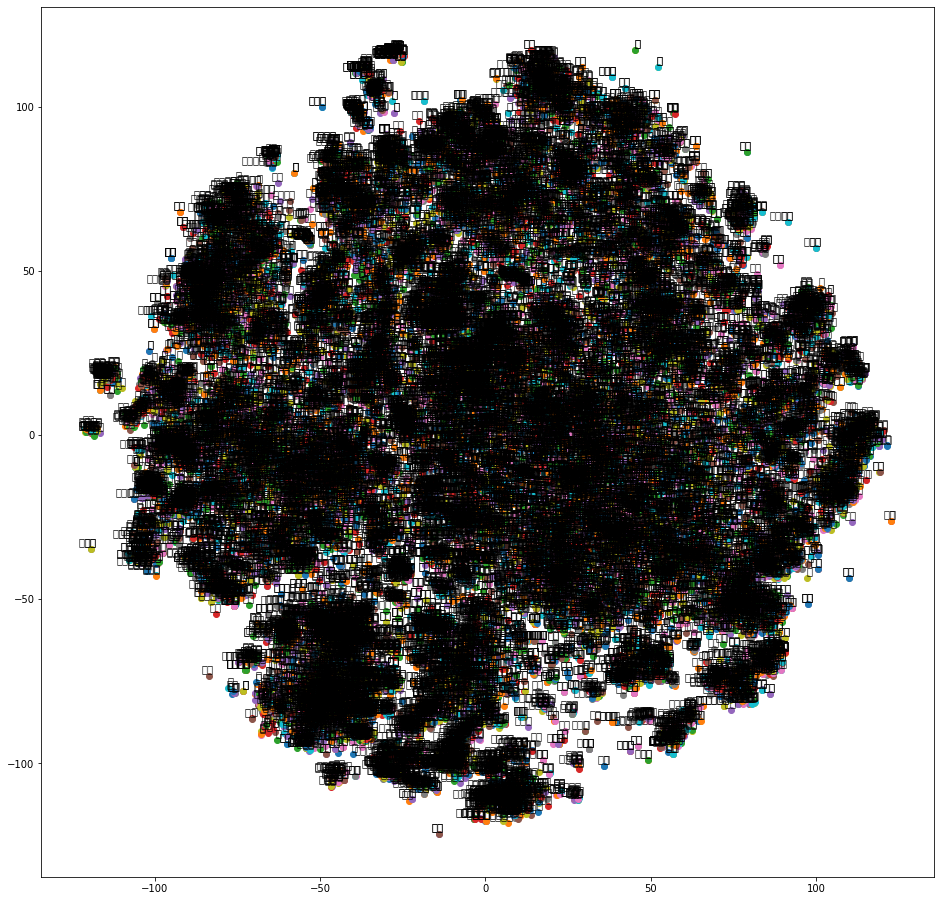

In [18]:
wiki_model = Word2Vec.load('wiki_min_count500.model')
tsne_plot(wiki_model)

In [19]:
print(1)

1
